# Project 1

## Which Zipcode in King County Has the Most Expensive Sales Price on Average in 2014-2015 and What Makes it the "Most Expensive Zipcode"?

### Introduction

House price is an important economic indicator that is closely correlated to important economic variables such as employment rate, wage, inflation, interest rate, and etc. In this case, house price prediction would also allow investors to identify fruitful investment. Thus, it is important to investigate what are some factors that can influence house price, and this would be the main goal of this project. This project uses the dataset "kc_house_data.csv" from Kaggle.com. It includes sales information of homes sold between May 2014 and May 2015 in King County, including Seattle. The sales information contains price of sales and 19 features (i.e. number of bedroom, view) on 21613 observations. 

To answer the question, Y variable is homes' price of sales in U.S. dollars, and it will be grouped by zipcode to make comparisons in average house prices between zipcodes. On the other hand, 3 house features have been chosen to be potential factors that can influence house price, and these would be the X variables - square footage of the homes' interior living space(sqft_living), quality of construction and design(grade), and view. (Note that grade is an index from 1 to 13, where 1-3 falls short of building construction and design, 7 is an average level, and 11-13 indicates a high quality level. View is an index from 0 to 4 of how good the view of the property was.) The first two features are chosen based on their relatively strong correlation with homes' sales price, and view is chosen because King County owns great views that zipcodes with better views might be more popular than other zipcodes. In general, Y variable is price, and X variables are sqft_living, grade, and view.

In this stage of the project, there are several important changes made from last stage:

1. Changed topic 
2. Made adjustments according to the comments
3. Added Message and corresponding graph explaining it
4. Added generated and fine-tuned maps
5. Updated intro and conclusion

First of all, the topic has been changed from "Which Zipcode in King County Has the Most Expensive Sales Price in 2021 on  Average?" to "Which Zipcode in King County Has the Most Expensive Sales Price on Average in 2014-2015 and What Makes it the "Most Expensive Zipcode"?". This is because it is quite impossible to build a price prediction model predicting future house prices based on this data, since we have to consider important factors such as time factor and changes in environment, infrastructures in order to build a valid and realistic prediction model. Thus, the topic has been changed to something more approachable based on the provided data. Secondly, adjustments have been made according to the comments on project 1. The comments include:
 
1. IMPORT DATA section: 
    - Output not explained
2. DATA CLEANING section: 
    - Cleaning Output could be condensed to only display the output                                                         that is most necessary for communicating what I'm doing
    - Output not explained
3. CHOOSING X VARIABLES section: 
    - no need to include cleaned_data1 output
4. CONCLUSION section: 
    - missing conclusion

Lastly, there are some new things added to the previous work, including message, graph explaining message, and fine-tuned maps. So these are the core changes that needs to be noticed.

### Import Data 

In [1]:
# ! pip install qeds
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qeds
import seaborn as sns
import warnings
%matplotlib inline

# activate plot theme
qeds.themes.mpl_style();

from IPython.display import display

In [2]:
# import and display dataset in dataframe format
data_path = "/Users/cindyxin/Documents/ECO225/ECO225Project/Data/kc_house_data.csv"
data = pd.read_csv(data_path)
pd.set_option("display.max_columns",21)
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570      7242     2.0           0     0          3      7   
2              770     10000     1.0           0     0          3      6   
3             1960      5000     1.0           0     0          5      7   
4             1680      8080     1.0           0     0          3      8   
...            ...       ...     ...         ...   ...        ...    ...   
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [3]:
# information of variables (check for null and type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

This dataframe contains no missing values (null) and all features except for date have types float and int. This gives some suggestions on data cleaning that we do not need to clean null values and we can convert type of date to datetime objects.

### Data Cleaning

In [4]:
# make a copy of data to make changes on
cleaned_data = data.copy()

In [5]:
# converting date's type to datetime object, and extract month and year 
# of sales
from datetime import datetime

cleaned_data["datetime"] = pd.to_datetime(cleaned_data.date)
cleaned_data["yr_sales"] = cleaned_data["datetime"].dt.year
cleaned_data["mth_sales"] = cleaned_data["datetime"].dt.month

# replace yr_renovated with renovation dummy for houses renovated
cleaned_data["renovated"] = cleaned_data["yr_renovated"].apply(
    lambda x : 0 if x == 0 else 1)

# drop "useless" columns
cleaned_data = cleaned_data.drop(["date", "yr_renovated", "datetime", "id"],
                                 axis = 1)

cleaned_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0     0          3      7        1180              0      1955    98178   
1     0          3      7        2170            400      1951    98125   
2     0          3      6         770              0      1933    98028   
3     0          5      7        1050            910      1965    98136   
4     0          3      8        1680              0      1987    98074   

       lat     long  sqft_living15  sqft_lot15  yr_sales  mth_sales  renovated  
0  47.5112 -122.257           1340        5650      2014         10          0  
1  47.7210 -122.319           1690        7639      2014         12          1  
2  47.7379 -122.233           2720        8062      2015          2          0  
3  47.5208 -122.393           1360        5000      2014         12          0  
4  47.6168 -122.045           1800        7503      2015          2          0

This output displays cleaned data. Three new columns are added- year of sales, month of sales, and renovated. We extracted year of sales and month of sales from sales date, and generated renovated dummy converted from year of renovation. Renovated is a dummy indicating whether the house was renovated or not. Renovated is included because instead of considering when the house was renovated, it's more meaningful to consider the house was renovated or not. Also, id is removed because there's no usefull information we can extract from it. In the end, date, yr_renovated, and id are removed from the original data while yr_sales, mth_sales, and renovated are added. 

### Choosing X Variables by Observing Correlation of House Price and Individual Features

In [6]:
# correlation with y variable
corr_matrix = cleaned_data.corr()
corr_matrix['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
yr_sales         0.003576
mth_sales       -0.010081
zipcode         -0.053203
Name: price, dtype: float64

The correlation matrix shows that most of the features except for zipcode is positively correlated to the Y variable- price. This is reasonable because zipcode is area code, so it does not have any correlation with price as it increase. Observing the correlation of each feature and price (Y variable), we are going to choose features that are most correlated to price as X variables. These features are sqft_living, and grade. Other than purely observing features with highest correlation, view is also really important in a sense because there are great views in King County that zipcodes with great views may be significantly more popular than zipcodes without great views. Thus, view would also be a X variable.

In [7]:
# new dataframe of chosen X variables and Y variables
cleaned_data1 = cleaned_data[["zipcode", "price", "sqft_living", 
                              "grade", "view"]]

### Summary Statistics

#### 1. Data not Grouped by Zipcode

In [8]:
# summary statistics of chosen Xs and Y
print(cleaned_data1.describe())

            zipcode         price   sqft_living         grade          view
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000
mean   98077.939805  5.400881e+05   2079.899736      7.656873      0.234303
std       53.505026  3.671272e+05    918.440897      1.175459      0.766318
min    98001.000000  7.500000e+04    290.000000      1.000000      0.000000
25%    98033.000000  3.219500e+05   1427.000000      7.000000      0.000000
50%    98065.000000  4.500000e+05   1910.000000      7.000000      0.000000
75%    98118.000000  6.450000e+05   2550.000000      8.000000      0.000000
max    98199.000000  7.700000e+06  13540.000000     13.000000      4.000000


This data includes 21613 home sales located in 199 different zipcodes from 2014 May to 2015 May, in King County. Price of homes ranged from 75,000 U.S.D. to 7,700,000 U.S.D. For all features, means are bigger than medians so they all have a right skewed distribution. Also, the standard deviation of price shows there's a sufficient spread in price, so it is a valid Y variable.

##### Price Distribution

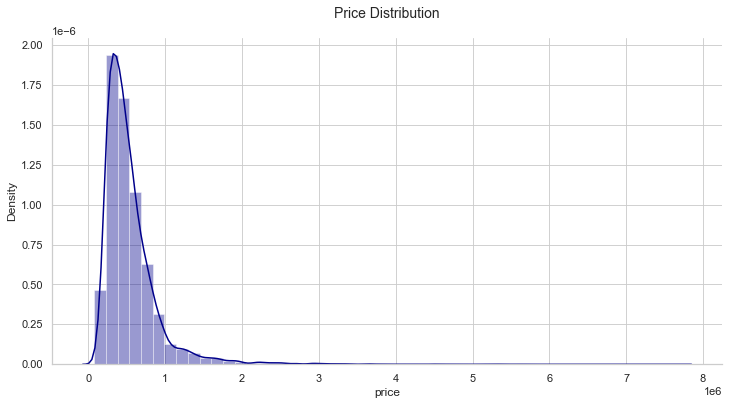

In [41]:
# histogram and kernel density estimation of price
sns.set(style = "whitegrid", rc = {"axes.spines.right": False, 
                                   "axes.spines.top": False})

fig = plt.figure(figsize = (12, 6))

sns.distplot(cleaned_data1.price, color = "darkblue")
plt.title("Price Distribution", fontsize = 14, pad = 20)

plt.show()

# hide warning
warnings.filterwarnings(action = "ignore")

In [10]:
# sales price ranked from high to low 
price_rank = cleaned_data1["price"].sort_values(ascending = False)
price_rank

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21613, dtype: float64

Together with the summary statistics, the histogram and KDE shows that the distribution of price is right skewed as stated before. This distribution also shows that the maximum price may be a possible outlier, in which may have caused the skew. However, in the sales price rank chart, there are homes sold at prices at the same level as the maximum price. Thus, the maximum price is possibly not an outlier and may be kept in the data.  

##### Sqft_living Distribution

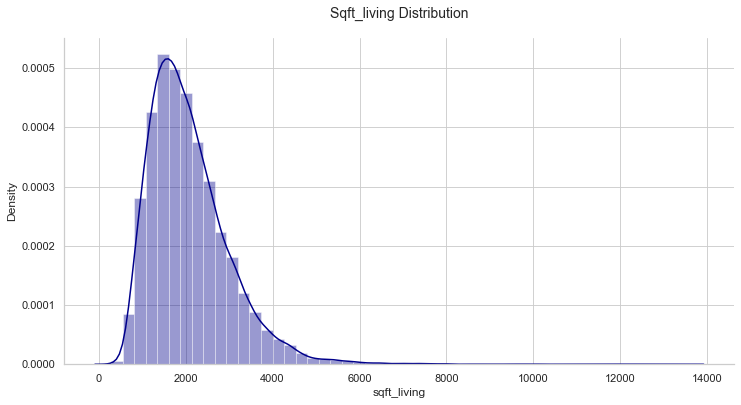

In [11]:
# histogram and kernel density estimation of sqft_living
fig = plt.figure(figsize = (12, 6))

sns.distplot(cleaned_data1.sqft_living, color = "darkblue")
plt.title("Sqft_living Distribution", fontsize = 14, pad = 20)

plt.show()

The distribution of square footage of the homes' interior living space is also right skewed, a similar shape to the price distribution. 

##### Relation between price and sqft_living

Text(0.5, 1.0, 'Price vs Sqft_living')

<Figure size 1440x1440 with 0 Axes>

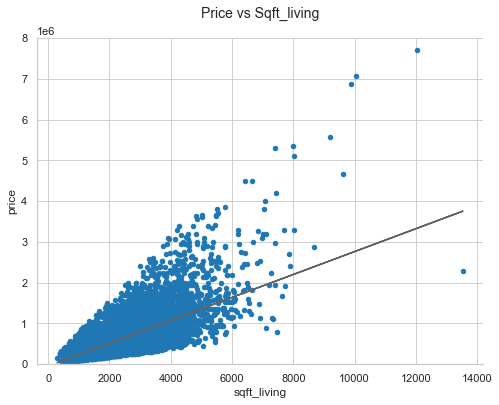

In [12]:
# scatterplot of price vs sqft_living
color1 = plt.cm.Paired(1)
fig = plt.figure(figsize = (20, 20))

cleaned_data1.plot.scatter(x = "sqft_living", y = "price", 
                           ylim = (0,8000000), figsize = (8, 6), 
                           c = np.array(color1).reshape(1,-1))

m, b = np.polyfit(cleaned_data1["sqft_living"], cleaned_data1["price"], 1)
plt.plot(cleaned_data1["sqft_living"], 
         m * cleaned_data1["sqft_living"] + b, c = plt.cm.tab20c(16))

plt.title("Price vs Sqft_living", fontsize = 14, pad = 20)

This is a scatterplot of price vs sqft_living. Although the scatterplot is heteroscedastic, it shows a clear positive relationship between the square footage of the homes' interior living space and price. As the square footage of the homes' interior living space increases, the price increases as well.  

##### Grade Distribution

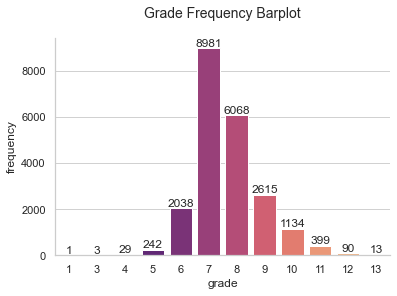

In [13]:
# barplot of grade
grade_bar = sns.countplot(x = cleaned_data1["grade"], data = cleaned_data1, 
                          palette = "magma")
plt.title("Grade Frequency Barplot", fontsize = 14, pad = 20)
plt.xlabel("grade")
plt.ylabel("frequency")
for count in grade_bar.containers:
    grade_bar.bar_label(count,)

plt.show()

This barplot shows that most of the homes have a grade of 6-9 in constrution and design. This indicates that most of the homes have a medium grade in construction and design. On the other hand, 4 homes have grades 1-3, which indicates poor construction and design. Also, 502 homes have high quality grades of 11-13 in construction and design.

##### Relation between price and grade

Text(0.5, 1.0, 'Price vs Grade')

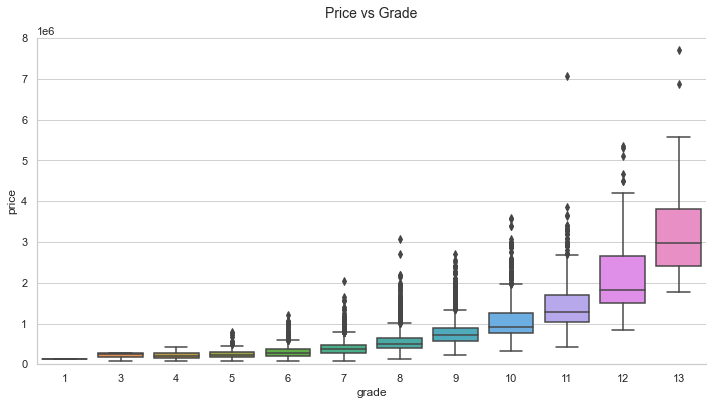

In [14]:
# boxplot of price vs grade
f, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["grade"], y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 8000000)
plt.title("Price vs Grade", fontsize = 14, pad = 20)

This boxplot shows a positive relationship between price and grade. Homes with lower construction and design grade tend to have lower sales price and homes with higher construction and design grade tend to have higher sales price. 

##### View Distribution

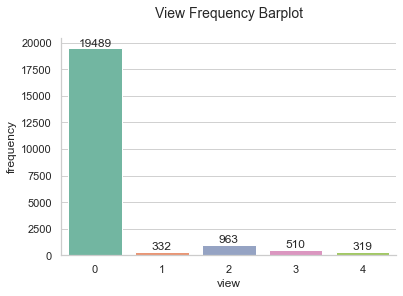

In [15]:
# barplot of view
view_bar = sns.countplot(x = cleaned_data1["view"] , data = cleaned_data1, 
                         palette = "Set2")
plt.title("View Frequency Barplot", fontsize = 14, pad = 20)
plt.xlabel("view")
plt.ylabel("frequency")
for count in view_bar.containers:
    view_bar.bar_label(count,)
 
plt.show()

Combining with the summary table, this barplot of grade of view shows that most of the homes sold have 0 as view grade. Only a small portion of homes have great views. Therefore, the relationship between view and y variable might not be as strong as other X variables. In this case, when comparing across zipcodes, comparing number of high view grades would possibly provide more information than comparing mean of view across zipcodes, which will be investigated later. (Mean of view would be very small and would not have obvious deviation across zipcodes)

##### Relation between price and view 

Text(0.5, 1.0, 'Price vs View')

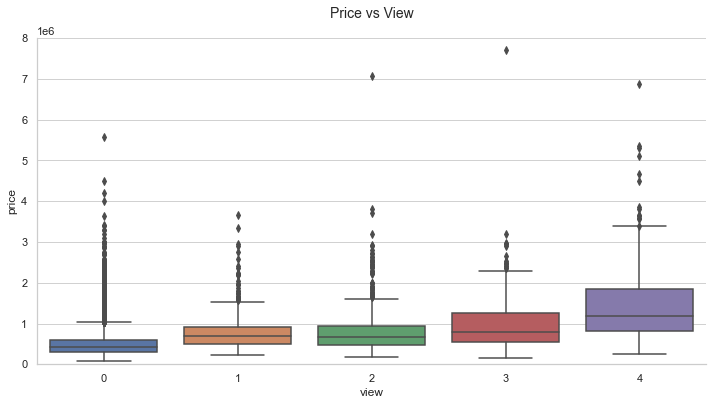

In [16]:
# boxplot of price vs view
f, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["view"], y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 8000000)
plt.title("Price vs View", fontsize = 14, pad = 20)

This is a boxplot of price vs view. Like the other features, view also has a positive but relatively weak relationship with price. Thus, houses with better views tend to have high sales price. 

Notice that there are several outliers in this graph, but these outliers may exist because these homes are possibly better in other features. Thus, it is still possible that homes without higher scores would have high sales price aswell. 

#### 2. Data Grouped by Zipcode

In [17]:
# dataset group by zipcode 
group = cleaned_data1.groupby("zipcode")

##### Price grouped by zipcode

In [18]:
# 2014-2015 average sales price of homes in different 
# zipcodes ranked by zipcode.
zipcode_mean_price = group["price"].mean()
zipcode_price_rank = zipcode_mean_price.sort_values(ascending = False)
zipcode_price_rank.reset_index()

zipcode         price
0     98039  2.160607e+06
1     98004  1.355927e+06
2     98040  1.194230e+06
3     98112  1.095499e+06
4     98102  9.012583e+05
..      ...           ...
65    98148  2.849086e+05
66    98001  2.808047e+05
67    98032  2.512962e+05
68    98168  2.403284e+05
69    98002  2.342840e+05

[70 rows x 2 columns]

Text(0, 0.5, 'mean price')

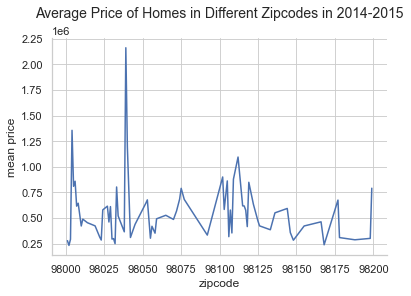

In [19]:
# price plot
cleaned_data1.groupby("zipcode")["price"].mean().plot()
plt.title("Average Price of Homes in Different Zipcodes in 2014-2015", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("mean price")

Both the table and the plot shows that in 2014-2015, homes in zipcode 98039 have the most expensive sales price on average.

##### Sqft_living grouped by zipcode

In [20]:
# 2014-2015 average square footage of the apartments' interior 
# living space in different zipcodes ranked by zipcode.
zipcode_mean_sqft_living = group["sqft_living"].mean()
zipcode_sqft_living_rank = zipcode_mean_sqft_living.sort_values(
    ascending = False)
zipcode_sqft_living_rank.reset_index()

zipcode  sqft_living
0     98039  3800.900000
1     98040  3106.833333
2     98075  3016.370474
3     98004  2909.022082
4     98006  2888.295181
..      ...          ...
65    98148  1610.526316
66    98107  1579.548872
67    98126  1543.596045
68    98106  1487.883582
69    98168  1468.624535

[70 rows x 2 columns]

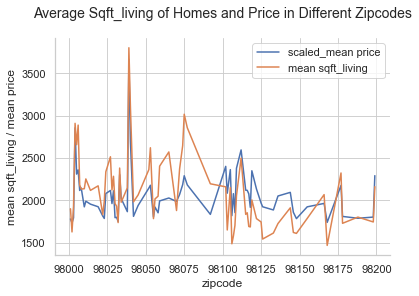

In [21]:
# scaled_price plot
cleaned_data1["scaled_price"] = cleaned_data1["price"]/1000+1500
cleaned_data1.groupby("zipcode")["scaled_price"].mean().plot()

# sqft_living plot
cleaned_data1.groupby("zipcode")["sqft_living"].mean().plot()

# label plot
plt.title("Average Sqft_living of Homes and Price in Different Zipcodes", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("mean sqft_living / mean price")

# legend
plt.legend(["scaled_mean price", "mean sqft_living"], loc ="upper right")

The ranked table of 2014-2015 average square footage of the apartments' interior living space in different zipcodes is ranked by zipcode. Some of the zipcodes' rank in area of interior living space do not vary by much than their rank in price. 

Same thing has been shown in the plot, in which compares the pattern of average interior area to the pattern of scaled average sales price in each zipcode. The plot shows there's a similar pattern in the two variables. The two variables' peaks tend to appear on the same zipcodes. This also shows a positive relationship between price and interior area.

##### Grade grouped by zipcode

In [22]:
# 2014-2015 average grade on quality of construction and design of 
# homes in different zipcodes ranked by zipcode.
zipcode_mean_grade = group["grade"].mean()
zipcode_grade_rank = zipcode_mean_grade.sort_values(ascending = False)
zipcode_grade_rank.reset_index()

zipcode     grade
0     98039  9.560000
1     98075  9.008357
2     98040  8.960993
3     98006  8.795181
4     98077  8.782828
..      ...       ...
65    98106  6.865672
66    98146  6.822917
67    98178  6.816794
68    98002  6.693467
69    98168  6.509294

[70 rows x 2 columns]

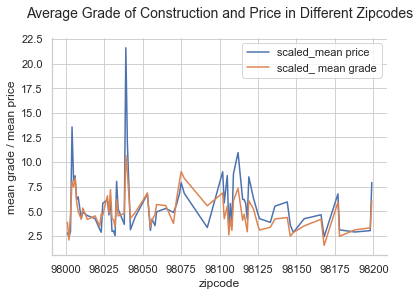

In [23]:
# scaled_price plot
cleaned_data1["scaled_price"] = cleaned_data1["price"]/100000
cleaned_data1.groupby("zipcode")["scaled_price"].mean().plot()

# scaled_grade plot
cleaned_data1["scaled_grade"] = cleaned_data1["grade"]*3-18
cleaned_data1.groupby("zipcode")["scaled_grade"].mean().plot()

# label plot
plt.title("Average Grade of Construction and Price in Different Zipcodes", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("mean grade / mean price")

# legend
plt.legend(["scaled_mean price", "scaled_ mean grade"], loc ="upper right")

The ranked table of 2014-2015 average grade of construction and design in different zipcodes is ranked by zipcode. The ranked table does not vary by much than the ranked table of price. Some of the zipcodes' rank in grade of construction and design do not vary by much than their rank in price. 

The plot, in which compares the pattern of scaled average grade of construction and design to the pattern of scaled average sales price in each zipcode, also shows similarity between the two variables. The two patterns are similar in shape. The peaks of the two variables tend to appear on the same zipcodes. This shows a positive relationship between price and grade of construction and design.

##### View grouped by zipcode

In [24]:
# 2014-2015 average grade on view of homes in different zipcodes 
# ranked by zipcode.
zipcode_mean_view = group["view"].mean()
zipcode_view_rank = zipcode_mean_view.sort_values(ascending = False)
zipcode_view_rank.reset_index()

zipcode      view
0     98070  1.084746
1     98177  0.815686
2     98040  0.783688
3     98166  0.665354
4     98006  0.634538
..      ...       ...
65    98168  0.014870
66    98077  0.010101
67    98002  0.010050
68    98031  0.007299
69    98148  0.000000

[70 rows x 2 columns]

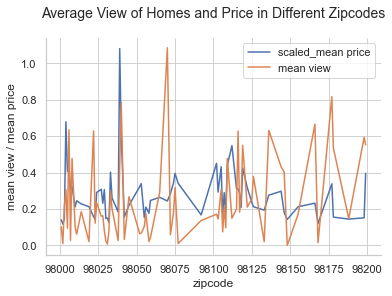

In [25]:
# scaled_price plot
cleaned_data1["scaled_price"] = cleaned_data1["price"]/2000000
cleaned_data1.groupby("zipcode")["scaled_price"].mean().plot()

# view plot
cleaned_data1.groupby("zipcode")["view"].mean().plot()

# label plot
plt.title("Average View of Homes and Price in Different Zipcodes", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("mean view / mean price")

# legend
plt.legend(["scaled_mean price", "mean view"], loc ="upper right")

The ranked table of 2014-2015 average grade of view in different zipcodes is ranked by zipcode. This ranked table does not show much similarity to the ranked table of price. However, observations could be made by observing the plot. 

The plot, which compares the pattern of average grade of view to the pattern of scaled average sales price in each zipcode, does not show much similarity in pattern of the two variables. However, some peaks of view does appear on zipcodes that have peaks in scaled price aswell. Thus in general, although this plot does not show much similarity in patterns of price and view, there still exists some similarity in the two variables. This indicates that there exists a weak relationship between view and price when grouped by zipcode. Referring back to the barplot of price vs view, due to the large quantity of houses with 0 grade for view, we can construct a plot that compares number of high grade view in different zipcodes and see if it can show more information than comparing mean of view. High would refer to a grade of 3 or 4.

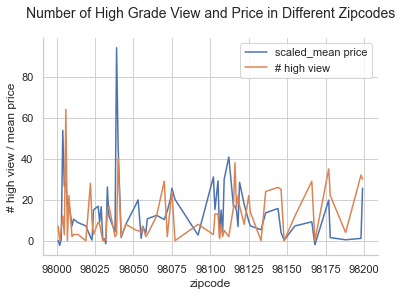

In [26]:
# scaled_price plot
cleaned_data1["scaled_price"] = cleaned_data1["price"]/20000-14
cleaned_data1.groupby("zipcode")["scaled_price"].mean().plot()

# high view count by zipcode
zipcode_count_hview = group["view"].apply(lambda x: x[x >= 3].count())
zipcode_count_hview.plot()

# label plot
plt.title("Number of High Grade View and Price in Different Zipcodes", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("# high view / mean price")

# legend
plt.legend(["scaled_mean price", "# high view"], loc ="upper right")

This plot shows more similarity in shape of view than the last plot. This indicates there's a stronger relationship between view and price when comparing number of high grade view across zipcodes than comparing mean of view. From the boxplot of view vs price, the two variables indeed has a clear relationship when not compared across zipcodes. Thus, this verifies that it would be more informative to compare the number of houses with high grade views (3 or 4) in different zipcodes than comparing the mean of view in different zipcodes.

In general, one important thing to notice is that in 2014-2015, homes in zipcode 98039 have the biggest square footage of the homes' interior living space. At the same time, this zipcode also has the best average grade on quality of construction and design, and the zipcode is on average the most expensive zipcode in the time period. The variable view itself has a positive relationship with price, but when comparing across zipcodes, simply comparing mean of view is not the best way. A better way is to compare number of houses with high grade view. We would investigate view across zipcodes further by using a map to visually display it.

# Project 2

### Main Message

The main message: Housing features- interior area, construction grade, and view have positive influence on house sales price, thus making zipcode 98039 the most expensive zipcode in King County in 2014-2015.

The potential evidence supporting this message is that the plots in the summary statistics section shows that the three features have positive relationship with house sales price. This allows us to assume there's probability of positive causality of the three features on y. The plots have also showed that zipcode 98039 was on average the most expensive zipcode in 2014-2015 in King County. Altogether, these builds up the main message. 

##### Plot

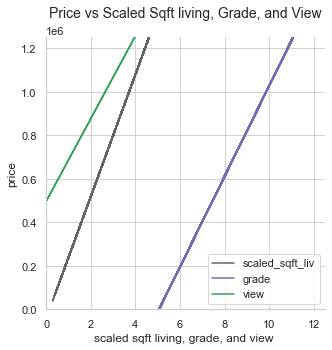

In [27]:
# plot of sqft_living, grade, and view vs price trend line 
color1 = plt.cm.Paired(1)
plt.figure(figsize = (5, 5))

# best-fit line of scaled_sqft_living vs price
cleaned_data1["scaled_sqft_liv"] = cleaned_data1["sqft_living"]/1000
m, b = np.polyfit(cleaned_data1["scaled_sqft_liv"], 
                  cleaned_data1["price"], 1)
plt.plot(cleaned_data1["scaled_sqft_liv"], 
         m * cleaned_data1["scaled_sqft_liv"] + b, c = plt.cm.tab20c(16))

# best-fit line of grade vs price 
m, b = np.polyfit(cleaned_data1["grade"], cleaned_data1["price"], 1)
plt.plot(cleaned_data1["grade"], 
         m * cleaned_data1["grade"] + b, c = plt.cm.tab20c(12))

# best-fit line of view vs price 
m, b = np.polyfit(cleaned_data1["view"], cleaned_data1["price"], 1)
plt.plot(cleaned_data1["view"], 
         m * cleaned_data1["view"] + b, c = plt.cm.tab20c(8))

# limits
plt.xlim((0, 12.5))
plt.ylim((0, 1250000))

# labels
plt.title("Price vs Scaled Sqft living, Grade, and View",
          fontsize = 14, pad = 20)
plt.xlabel("scaled sqft living, grade, and view ")
plt.ylabel("price")

# legend
plt.legend(["scaled_sqft_liv", "grade", "view"], loc = "lower right")

##### Plot Interpretation

This plot shows the relationship of each of the three X variables- sqft_living, grade, and view with price. Observing the three best-fit lines, all three regression lines are positively sloped. As the three features increase, price increases as well. This indicates that all three features have positive relationship with price. Since all three features have clear positive relationships with price, it's more probable to infer positive causal relationship between each of the three variables and price. 

We are using this plot because it is the cleanest and simplest way to display relationship between the features and price. It makes it very easy for us to identify the relationships. It is barely possible to use other plots because there are too many observations and the X variables are different types of variables (1 continuous variable, 2 categorical variables). Some rescaling has been done to display all three trend lines, and the trend lines are visually easy to identify due to the differentiation in color and the existence of the legend. 

One additional information we can extract from this plot is that the best-fit line of interior living area has a steeper slope than the best-fit line of other two features, and grade's best-fit line is a little bit steeper than view's. If we are able to infer positive causal relationship between each of the three variables and price, then it's possible that increase in interior living area can cause a larger increase in price than the individual effect of increase in view grade and increase in construction grade on price. 

### Maps

Click [here](https://utoronto-my.sharepoint.com/:f:/g/personal/cindyxin_xin_mail_utoronto_ca/Ek8psA_w8uZIuqNroG3UNMsB1enlMbSWK6edC0wotdnELA?e=gsP3mK) to see map with hover.

or by link: https://utoronto-my.sharepoint.com/:f:/g/personal/cindyxin_xin_mail_utoronto_ca/Ek8psA_w8uZIuqNroG3UNMsB1enlMbSWK6edC0wotdnELA?e=gsP3mK

#### Reading U.S. Zipcode and County Shape Data

In [28]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [29]:
# Read Zipcode Shape
zipcode_df = gpd.read_file(
    "https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip")
zipcode_df.head()

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0     43451   43451        B5   G6350          S   63484186    157689   
1     43452   43452        B5   G6350          S  121522304  13721730   
2     43456   43456        B5   G6350          S    9320975   1003775   
3     43457   43457        B5   G6350          S   48004681         0   
4     43458   43458        B5   G6350          S    2573816     39915   

    INTPTLAT10    INTPTLON10  \
0  +41.3183010  -083.6174935   
1  +41.5157923  -082.9809454   
2  +41.6318300  -082.8393923   
3  +41.2673301  -083.4274872   
4  +41.5304461  -083.2133648   

                                            geometry  
0  POLYGON ((-83.70873 41.32733, -83.70815 41.327...  
1  POLYGON ((-83.08698 41.53780, -83.08256 41.537...  
2  MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...  
3  POLYGON ((-83.49650 41.25371, -83.48382 41.253...  
4  POLYGON ((-83.22229 41.53102, -83.22228 41.532...

In [30]:
# Read County Shape
county_df = gpd.read_file(
    "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip")
county_df.head()

STATEFP COUNTYFP  COUNTYNS  GEOID       NAME          NAMELSAD LSAD CLASSFP  \
0      31      039  00835841  31039     Cuming     Cuming County   06      H1   
1      53      069  01513275  53069  Wahkiakum  Wahkiakum County   06      H1   
2      35      011  00933054  35011    De Baca    De Baca County   06      H1   
3      31      109  00835876  31109  Lancaster  Lancaster County   06      H1   
4      31      129  00835886  31129   Nuckolls   Nuckolls County   06      H1   

   MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND    AWATER     INTPTLAT  \
0  G4020  None   None     None        A  1477652222  10690952  +41.9158651   
1  G4020  None   None     None        A   680962890  61582307  +46.2946377   
2  G4020  None   None     None        A  6016819475  29089486  +34.3592729   
3  G4020   339  30700     None        A  2169270569  22849484  +40.7835474   
4  G4020  None   None     None        A  1489645188   1718484  +40.1764918   

       INTPTLON                                           geometry  
0  -096.7885168  POLYGON ((-97.01952 42.00410, -97.01952 42.004...  
1  -123.4244583  POLYGON ((-123.43639 46.23820, -123.44759 46.2...  
2  -104.3686961  POLYGON ((-104.56739 33.99757, -104.56772 33.9...  
3  -096.6886584  POLYGON ((-96.91075 40.78494, -96.91075 40.790...  
4  -098.0468422  POLYGON ((-98.27367 40.08940, -98.27367 40.089...

In [31]:
king_df = county_df.loc[county_df["NAME"] == "King"]
king_df

STATEFP COUNTYFP  COUNTYNS  GEOID  NAME     NAMELSAD LSAD CLASSFP  MTFCC  \
2021      53      033  01531933  53033  King  King County   06      H1  G4020   
2652      48      269  01383920  48269  King  King County   06      H1  G4020   

     CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND     AWATER     INTPTLAT  \
2021   500  42660    42644        A  5478557088  497719285  +47.4905993   
2652  None   None     None        A  2359148814    6398044  +33.6142675   

          INTPTLON                                           geometry  
2021  -121.8339960  POLYGON ((-122.47069 47.52789, -122.46985 47.5...  
2652  -100.2453455  POLYGON ((-100.51869 33.83565, -100.51861 33.8...

Given the STATEFP, STATEFP 53 indicates that the first one is the one we want, which means it's the one in Washington. The second one with STATEFP 48 is in Texas, which we don't need. From this output, we know INTPTLAT, INTPTLON, and geometry of King County, are useful information when generating maps.

#### Visualizing Mean Price by Zipcode on a Map

##### Import Packages and Setup Dataframe for Bokeh Map
It's impossible to combine price by zipcode (zipcode_mean_price) and zipcode shape data (zipcode_df) directly because there's no zipcode column in zipcode shapefile, and ZCTA5CE10 is not the same as zipcode from our original data. A general outline of how the two data could be combined:
1. get 1 point coordinate for each zipcode from house sales data (naming these coordinates zipcode indicator   coordinates)
2. Check EPSG, and convert zipcode indicator coordinates to geodata
3. gpd.sjoin zipcode indicator coordinates with zipcode shapefile polygons to align zipcode with INTPTLAT10, and INTPTLON10. 
4. to add the polygons back into the file, merge the dataframe with zipcode shape data again by on = "INTPTLAT10". The floats in this column are specific enough so we don't need to consider INTPTLON10 at the same time. 
5. merge the dataframe with zipcodes' mean price 
6. create new daframe with columns zipcode, geometry(polygon), and price. <br>

Then, we could convert this new dataframe to geojson, and then it could be used directly when generating bokeh map.

In [32]:
# import packages
# !pip install bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

Loading BokehJS ...

In [33]:
# Getting 1 point coordinate for each zipcode from house sales 
# data, let's call them zipcode indicator coordinates

# 1. group house sales data by zipcode
zip_group = cleaned_data.groupby("zipcode")

# 2. take mean of longtitudes and lattitudes of houses in each 
# zipcode group
zipcode_mean_long = zip_group["long"].mean()
zipcode_mean_lat = zip_group["lat"].mean()

# 3. zip longtitude and lattitude of each zipcode and make 
# a list of it 
long_lat = list(zip(zipcode_mean_long, zipcode_mean_lat))

# 4. make new dataframe with 1 coordinate per zipcode
long_lat_df = pd.Series(long_lat).to_frame("coordinates")
zipcode_mean_lat = zipcode_mean_lat.reset_index()
long_lat_df["zipcode"] = zipcode_mean_lat["zipcode"]

In [34]:
# converting zipcode indicator coordinates to geodata
long_lat_df["coordinates"] = long_lat_df["coordinates"].apply(Point)
geo1_df = gpd.GeoDataFrame(long_lat_df, geometry = "coordinates")
geo1_df

coordinates  zipcode
0   POINT (-122.27065 47.30902)    98001
1   POINT (-122.21336 47.30878)    98002
2   POINT (-122.31005 47.31574)    98003
3   POINT (-122.20519 47.61618)    98004
4   POINT (-122.16727 47.61153)    98005
..                          ...      ...
65  POINT (-122.36928 47.74238)    98177
66  POINT (-122.24697 47.49912)    98178
67  POINT (-122.28099 47.44731)    98188
68  POINT (-122.31574 47.39079)    98198
69  POINT (-122.39846 47.64810)    98199

[70 rows x 2 columns]

This output shows that now we obtain 1 coordinate per zipcode (zipcode indicator coordinates). Next step, we will plug the indicator coordinates into the zipcode shape data's polygons to align zipcodes with their shapes. 

In [35]:
# gpd.sjoin zipcode indicator coordinates with zipcode shape data 
# polygons. Now we've aligned zipcode with INTPTLAT10, and INTPTLON10
zipcode_ZCTA_merge = gpd.sjoin(geo1_df, zipcode_df, op = "within")

# merge the above dataframe with zipcode shapefile to align zipcode 
# and zipcode polygon by on = "INTPTLAT10 or INTPTLON10"
zipcode_shape = zipcode_ZCTA_merge.merge(zipcode_df, on = "INTPTLAT10")

# merge zipcode shape data with mean price of each zipcode by on = "zipcode"
price_zip = zipcode_shape.merge(zipcode_mean_price, on = "zipcode")

# extract zipcode, zipcode geometry, and price
price_zip1 = price_zip[["zipcode", "geometry", "price"]]

# converting data to geojson
price_zip1 = gpd.GeoDataFrame(price_zip1, geometry = "geometry")
price_zip2 = GeoJSONDataSource(geojson = price_zip1.to_json())

##### Generating Bokeh Map

In [36]:
# reverse high and low values for better color visualization
color_mapper = LinearColorMapper(palette = brewer["YlOrRd"][9],
                                 low = 2.2e+06, high = 2.3e+05)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,
                     width = 510, height = 18, border_line_color = None, 
                     location = (0,0), orientation = "horizontal")

hover = HoverTool(tooltips = [ ("Zipcode","@zipcode"), (
                                "Mean Price", "@price")])

plot = figure(title = "Price by Zipcode", tools = [hover])
plot.patches("xs", "ys", source = price_zip2, 
             fill_color = {"field": "price", "transform": color_mapper})

plot.add_layout(color_bar, "below")
show(plot)

This hover map displays the average house sales price of each zipcode. The most expensive zipcode is 98039, dark red in color. Then, in order, the second most expensive zipcode is 98004, and next is 98040. The two zipcodes with moderate sales price are 98112 and 98102, located beside 98039. Note that these zipcodes are located together geographically, approximately at lattitude +47.6 and longtitude -122.2. More generally, houses in the north tend to be more expensive than houses in the south. This indicate that there may be geographic advantages in the north. 

#### Visualizing Average Square Footage of the Apartments' Interior Living Space by Zipcode on a Map

##### Setup Dataframe for Bokeh Map
For this bokeh map, it would follow the same procedure as the first bokeh map, except this time, we can directly use the aligned zipcode and zipcode polygon data- zipcode_shape. One thing different is that now we are mapping interior living area instead of price. 

In [37]:
# merge zipcode shape data with mean sqft_living of each zipcode 
# by on = "zipcode"
sqft_living_zip = zipcode_shape.merge(zipcode_mean_sqft_living, 
                                      on = "zipcode")

# extract zipcode, zipcode geometry, and price
sqft_living_zip1 = sqft_living_zip[["zipcode", "geometry", 
                                    "sqft_living"]]

# converting data to geojson
sqft_living_zip1 = gpd.GeoDataFrame(sqft_living_zip1, geometry = 
                                    "geometry")
sqft_living_zip2 = GeoJSONDataSource(geojson = 
                                     sqft_living_zip1.to_json())

##### Generating Bokeh Map

In [38]:
# reverse high and low values for better color visualization
color_mapper = LinearColorMapper(palette = brewer["YlOrRd"][9], 
                                 high = 1460, low = 3810)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,
                     width = 510, height = 18, border_line_color = None, 
                     location = (0,0), orientation = "horizontal")

hover = HoverTool(tooltips = [ ("Zipcode","@zipcode"), (
                                "Mean Sqft Living", "@sqft_living")])

plot = figure(title = "Sqft_living by Zipcode", tools = [hover])
plot.patches("xs", "ys", source = sqft_living_zip2, 
             fill_color = {"field": "sqft_living", "transform": color_mapper})

plot.add_layout(color_bar, "below")
show(plot)

Square footage of the apartments' interior living space has been chosen to be the most important X variable since it has the highest correlation to price. Due to its high correlation with price, the map shows a similar color distribution as map of price. Zipcode 98039 on average has the largest interior area and zipcodes 98040 has the second largest average interior area. Zipcode 98004, located beside 98039 and has the second most expensive average sales price, also has a large average interior area along with a few other zipcodes located in the north. Again, zipcodes in the north tend to have larger interior area on average at the same time as having higher sales price. This verifies a positive relationship between interior living area and price when grouped by zipcode. 

#### Visualizing Number of Houses with High Grade in View by Zipcode on a Map

From the previous view plot, we notice that it would be more meaningful to compare number of high grade views in different zipcodes than comparing mean of view in different zipcodes. Due to the fact that a large portion of houses sold has 0 in view grade, if we map mean of view by zipcode in a hover map, the colors of zipcodes in the hover map would not have obvious deviations. Thus, we will map number of high grade view by zipcode instead. The bokeh map will be generated using a similar method as before.

##### Setup Dataframe for Bokeh Map

In [39]:
# merge zipcode shape data with number of high view of each zipcode 
# by on = "zipcode"
view_zip = zipcode_shape.merge(zipcode_count_hview, on = "zipcode")

# extract zipcode, zipcode geometry, and price
view_zip1 = view_zip[["zipcode", "geometry", "view"]]

# converting data to geojson
view_zip1 = gpd.GeoDataFrame(view_zip1, geometry = "geometry")
view_zip2 = GeoJSONDataSource(geojson = view_zip1.to_json())

##### Generating Bokeh Map

In [40]:
# reverse high and low values for better color visualization
color_mapper = LinearColorMapper(palette = brewer["YlOrRd"][9], 
                                 high = 0, low = 65)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,
                     width = 510, height = 18, border_line_color = None, 
                     location = (0,0), orientation = "horizontal")

hover = HoverTool(tooltips = [ ("Zipcode","@zipcode"), ("View", "@view")])

plot = figure(title = "View by Zipcode", tools = [hover])
plot.patches("xs", "ys", source = view_zip2, 
             fill_color = {"field": "view", "transform": color_mapper})

plot.add_layout(color_bar, "below")
show(plot)

It is essential to generate a map for view because there needs further explanation on the variable when grouped by zipcode, This plot shows obvious deviation in color across different zipcodes, further proving that comparing number of houses with high grade in view across zipcodes is an acceptable method. 

Observing the map, zipcodes 98006 and 98040 tend to have most houses with high grade in view, whereas zipcode 98039 (highest sales price zipcode) has a low number of high grade in view. This means zipcode 98039 is the most expensive zipcode does not have anything to do with view. However, view has a strong positive relationship with the house prices in zipcodes 98006 and 98040. Thus, it is still possible to hypothesize that there's causal relationship in view on price. In other words, it is still possible to say that having a great view can be a factor making some zipcodes expensive.

Also, notice that the number of high grade in view tend to be higher in zipcodes located by the waterbody on the west, and higher in the zipcode on the south, showing small similarity between view's color distribution and price's color distribution. In this case, it is also possible to hypothesize that view's effect on price might not be as strong as the other variables. 

### Conclusion

In conclusion, zipcode 98039 is on average the most expensive zipcode. The houses in this zipcode has largest interior living area on average, and highest average construction grade. Also, there are positive relationships between each of the three X variables- interior living area, construction grade, goodness of view, and Y variable- price individually. This makes it possible to observe causal relationship in the three features on Y individually. 

Some new findings include that previous topic is impossible to approach in reality, and that when comparing view across zipcodes, it's better to compare number of high grades in view than mean of view across zipcodes. Also, from the maps, zipcodes that are located by lattitude +47.6 and longtitude -122.2 have higher prices, larger interior living area, and most of these zipcodes have higher number great views relative to other zipcodes.

At last, possible future step is to observe causal relationship in each of the three features with price. 